## PCA and Text Analysis

This assignment involves processing real e-mails, some of which are scams.

Fair warning: Some of these scam e-mails have offensive content. If you start reading the e-mail text or the token data, you might read something offensive. If that's a problem, feel free to e-mail me, and we can talk about it and discuss how to proceed with alternative tasks.

### Q1.

**Tokens**: The individual words or symbols that create text data like emails. Natural Language Processing is primarily about analyzing the frequency and co-occurrence of tokens.

I aggregated all the emails into a single vector, and removed the punctuation and very common words (e.g. "the"). Run the below code chunk to open it, and use the Counter class to look at the most common words:

In [18]:
import pickle #Ran the below code chunk to open it
with open("all_tokens.pickle", "rb") as file:
    all_tokens = pickle.load(file)

In [19]:
from collections import Counter #Used the Counter class to look at the most common words
token_count = Counter(all_tokens)
token_freq = token_count.most_common()

In [20]:
token_count

Counter({'1100': 6,
         'disc': 30,
         'uniformitarianism': 4,
         '1086': 2,
         'sex': 150,
         'lang': 28,
         'dick': 21,
         'hudson': 4,
         'observations': 4,
         'use': 389,
         'side': 31,
         'galicismos': 1,
         'galicismo': 1,
         'spanish': 85,
         'term': 115,
         'names': 78,
         'improper': 2,
         'introduction': 22,
         'french': 97,
         'words': 95,
         'sounding': 6,
         'thus': 11,
         'deceptive': 1,
         'equistar': 22,
         'deal': 324,
         'tickets': 41,
         'still': 178,
         'available': 373,
         'assist': 16,
         'robert': 82,
         'entering': 15,
         'new': 1365,
         'talking': 58,
         'bryan': 18,
         'hull': 3,
         'anita': 21,
         'luong': 1,
         'kyle': 2,
         'hello': 501,
         'hot': 110,
         'lil': 8,
         'horny': 17,
         'toy.': 7,
         'one': 

In [21]:
token_freq

[('new', 1365),
 ('date', 1202),
 ('get', 1052),
 ('please', 1022),
 ('enron', 927),
 ('like', 923),
 ('2002', 869),
 ('would', 806),
 ('one', 798),
 ('message', 795),
 ('call', 740),
 ('free', 691),
 ('software', 680),
 ('dear', 651),
 ('know', 644),
 ('email', 629),
 ('url:', 625),
 ('time', 609),
 ('start', 604),
 ('linguistics', 598),
 ('online', 591),
 ('need', 587),
 ('wrote:', 585),
 ('see', 554),
 ('conference', 553),
 ('language', 550),
 ('want', 548),
 ('empty', 546),
 ('hourahead', 526),
 ('list', 523),
 ('attached', 515),
 ('hello', 501),
 ('university', 500),
 ('2001', 489),
 ('information', 473),
 ('vince', 473),
 ('may', 461),
 ('good', 449),
 ('following', 448),
 ('hour', 446),
 ('2000', 442),
 ('business', 442),
 ('save', 423),
 ('first', 423),
 ('click', 423),
 ('best', 423),
 ('make', 421),
 ('com', 413),
 ('original', 410),
 ('offer', 405),
 ('meeting', 403),
 ('thanks', 397),
 ('mail', 395),
 ('use', 389),
 ('find', 386),
 ('papers', 383),
 ('http', 378),
 ('sent',

Plot a histogram of the occurrences of tokens.

What do you notice about the frequency of occurrence of different tokens? How does it look?

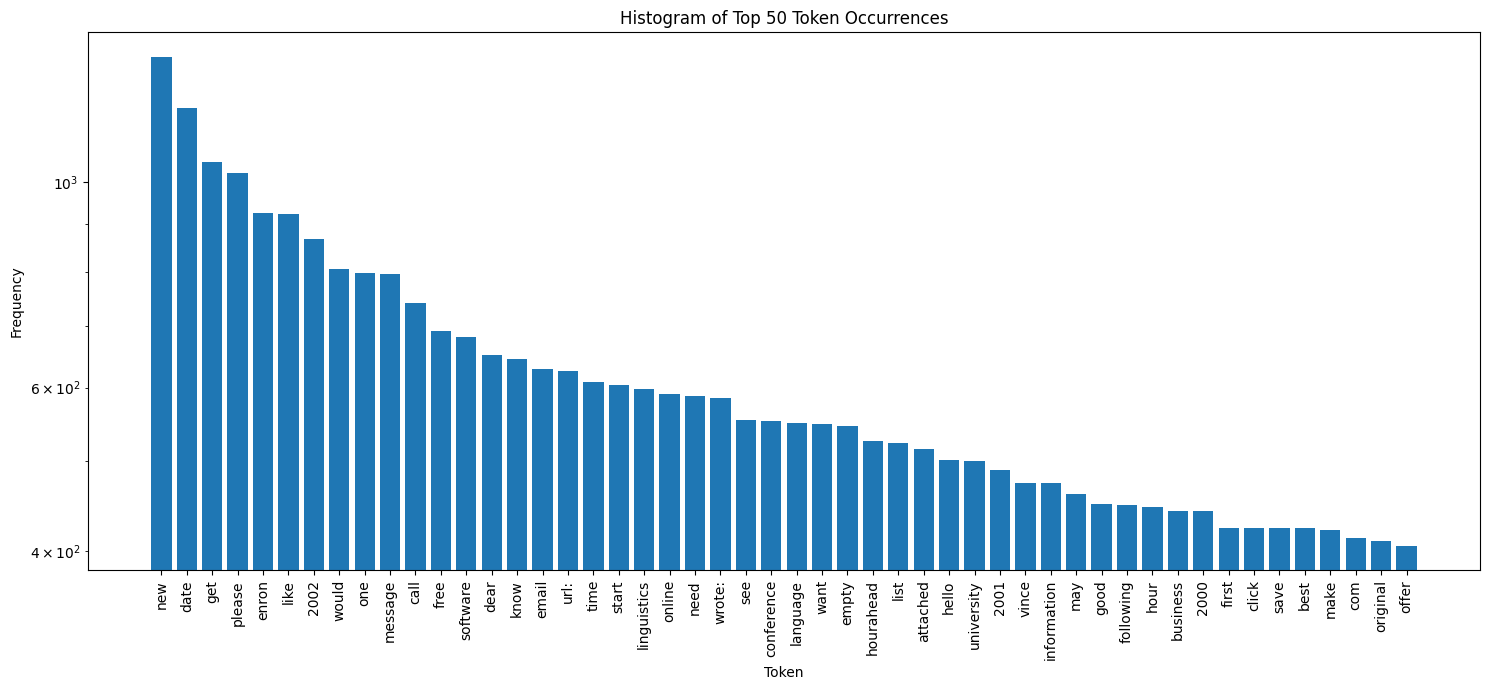

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# If token_count is a dictionary: {'the': 120, 'and': 98, ...}
token_freq_df = pd.DataFrame(token_count.items(), columns=["Token", "Frequency"])

# Sort by frequency and take top 50
token_freq_df = token_freq_df.sort_values(by="Frequency", ascending=False).head(50)

plt.figure(figsize=(15, 7))
plt.bar(token_freq_df["Token"], token_freq_df["Frequency"])
plt.xticks(rotation=90)
plt.xlabel("Token")
plt.ylabel("Frequency")
plt.yscale("log")  # optional
plt.title("Histogram of Top 50 Token Occurrences")
plt.tight_layout()
plt.show()

The histogram shows a decline in the frequency of the number of tokens used in the emails. In fact, I feel as though less people use longer words, like "conference" or "linguistics", but more people use words like "new" or "date", which is easier to use. Overall, the graph seems to show a continuous decline as we go through the number of tokens used.

### Q2.

Load `Phishing_clean.parquet`. This is the text from the e-mails broken into the most common 2,711 tokens and one-hot-encoded as features/covariates. So each row is an e-mail, the `Email Type` takes the value 1 if it's a scam and 0 otherwise, and every other column is a word or symbol that occurs in at least 15 e-mails.

1. Perform an 80/20 train-test split of the data.
2. Run a regression of $y$ on the one-hot-encoded emails. What is the $R^2$ on the test set? On the training set?
3. What words have the largest coefficients in absolute value and most strongly influence predictions?

In [3]:
phishing_df = pd.read_parquet("Phishing_clean.parquet")

2.1

In [5]:
from sklearn.model_selection import train_test_split

X = phishing_df.drop(columns = ["Email Type"])   #all predictor variables
y = phishing_df["Email Type"]                   #target variable

X_train, X_test, y_train, y_test = train_test_split( #Perform 80/20 train-test split
    X, y, test_size = 0.2, random_state = 42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (14907, 2711)
Testing set size: (3727, 2711)


2.2

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() #Fit regression
model.fit(X_train, y_train)

r2_train = model.score(X_train, y_train) #Compute R²
r2_test = model.score(X_test, y_test)

print("R² (training):", r2_train)
print("R² (test):", r2_test)

R² (training): 0.7670143724934355
R² (test): 0.6658718438847919


2.3

In [11]:
import numpy as np
import pandas as pd

feature_names = X.columns #Get feature names (your one-hot-encoded words)

coefs = model.coef_ #Get the fitted coefficients

coef_df = pd.DataFrame({ #Combine into a DataFrame
    "word": feature_names,
    "coefficient": coefs,
    "abs_value": np.abs(coefs)
})

coef_df = coef_df.sort_values(by = "abs_value", ascending = False) #Sort by absolute value of coefficient

print(coef_df.head(10)) #Show the top influential words

                   word  coefficient  abs_value
835        intervention    -1.259257   1.259257
740           localized     0.824350   0.824350
2362            thermal     0.747006   0.747006
851             crawler     0.696167   0.696167
1504  background-image:    -0.622909   0.622909
1406         helvetica,     0.598560   0.598560
906               aging     0.594956   0.594956
1839              form.     0.576886   0.576886
2242              gray;    -0.574480   0.574480
1552           a:active     0.574480   0.574480


The words with the largest positive coefficients are associated with a higher y. These include "localized" and "thermal". The words with the largest negative coefficients are associated with a lower y. These include "intervention" and "background-image". The highest absolute value for the coefficient is show to be "intervention", showing it has the highest influence.

### Q3.

Take the matrix of one-hot-encoded tokens (the data, less the outcome variable, `Email Type`) and perform a principal components analysis decomposition with two components. Plot the first two principal components in a scatter plot, and hue the points by whether they are a phishing scam or not. Do you notice any patterns?

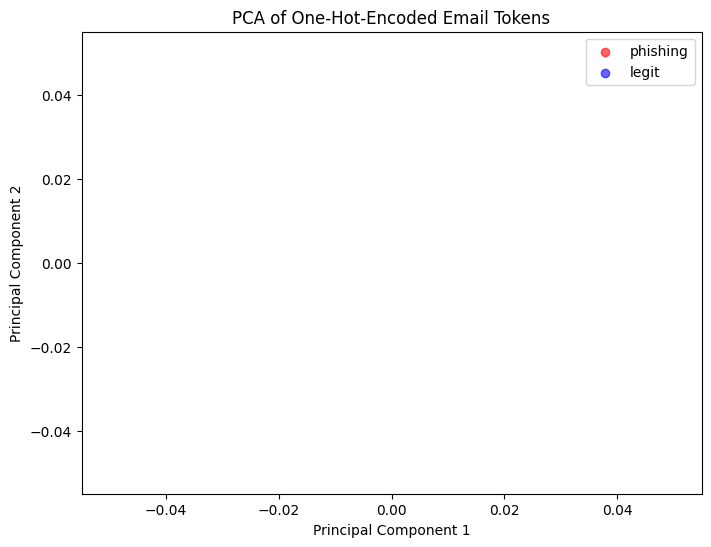

Explained variance ratio: [0.00458126 0.00419643]


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = phishing_df.drop(columns = ["Email Type"])  #One-hot-encoded token matrix
y = phishing_df["Email Type"]

scaler = StandardScaler(with_mean=False)  #Scale features (important for PCA)
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components = 2, random_state = 42) #PCA decomposition into 2 components
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"]) #Combine into a DataFrame for plotting
pca_df["Email Type"] = y.values

plt.figure(figsize=(8,6)) #Plot
for label, color in zip(["phishing", "legit"], ["red", "blue"]):
    subset = pca_df[pca_df["Email Type"] == label]
    plt.scatter(subset["PC1"], subset["PC2"], label = label, alpha = 0.6, color = color)

plt.title("PCA of One-Hot-Encoded Email Tokens")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_) #Check explained variance

### Q4.

Run a linear regression of $y$ on the first 2,610 principal components of $X$. What is the $R^2$ on the training and test sets? (I used cross validation to determine that 2,610 was approximately optimal, but not all 2,711 components.)

How does this performance compare to the linear regression?

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Truncated SVD (PCA for sparse data)
n_components = 2610
svd = TruncatedSVD(n_components=n_components, random_state=42)
X_train_pca = svd.fit_transform(X_train)
X_test_pca = svd.transform(X_test)  # use the same components


### Q5.

Explain briefly in your own words what the advantage is in using the principal components to run this high-dimensional regression, rather than the original data.